# Parameters

Notebook for Parameters notes and exercise

Ultimately the goal of any machine learning model is to be able to predict as accurately as possible an output (y) based on a given input (x). The objective is to fit a regression line to the known data where x is the inpedendant variable and y is the dependant variable based on some function of x. By evaluating a best fit function for x it allows for any value of y to be predicted to a degree of accuracy. 


1. What are parameters <br>
(https://www.geeksforgeeks.org/difference-between-model-parameters-vs-hyperparameters/)<br>
(https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/#:~:text=What%20is%20a%20Model%20Parameter,the%20model%20on%20your%20problem)

- In an equation such as y = 4x + 2, the "4" represents the slope of the line (m), i.e. for each successive value of x, y is 4 times that. The "2" in the equation represents where on the y axis the line crosses when x = 0, in this case 2 , or c. In this simple example the equation is the model, the 4 and 2 are the model parameters. 
- The challenge is, given a set of data, how to find the optimum parameters for the model function as these parameters have to be estimated from the data.

In [1]:
# Import the required libraries, numpy and matplotlib
import numpy as np

import matplotlib.pyplot as plt

### Section - Trying out the concepts of generating a value y based on an input x. 

In [37]:
# Generate some numbers for the x value, this generates 20 evenly spaced values from0 to 10. 
x = np.linspace(0,10,21)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [38]:
# Make up a function for y to do some plotting and introduce some "noise" using the random.normal function. 
# This creates some level of variation in the value of output y. 
y = 6*x - 4 + np.random.normal(0,1,len(x))
y

array([-5.03708436,  0.20974351,  1.91631775,  5.24435521,  7.51530674,
       12.09110983, 14.85840417, 15.97225305, 19.74553976, 23.39282966,
       24.9249432 , 29.01463606, 33.04450265, 34.37925105, 38.73722549,
       40.78576507, 42.85890744, 47.86115176, 49.30335669, 52.27659265,
       55.86023552])

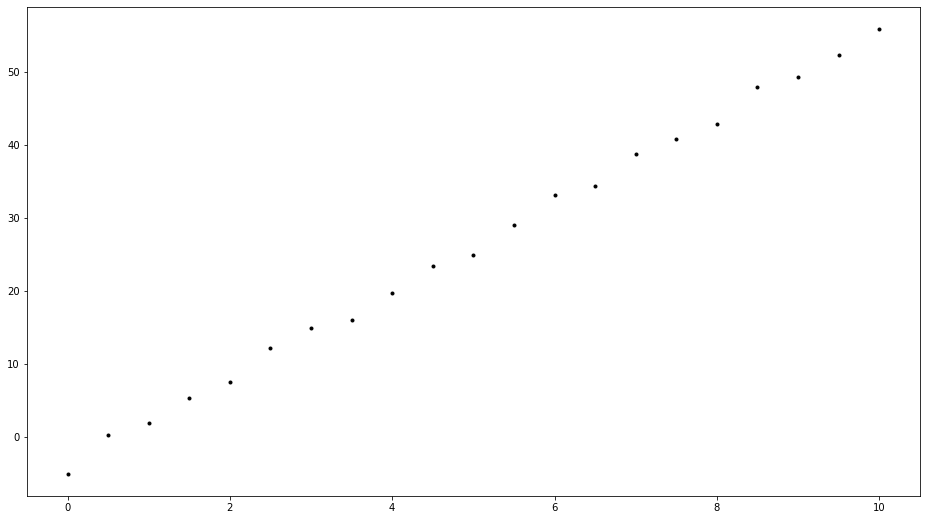

In [39]:
# Generate the plot to see what it looks like. 
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x,y,'k.');

As expected, the plot shows the output for y based on x. 
From a visual inspection it is clear that it approximates a straight line with the random function in the formula generating some level of deviation from a perfect straight line.

When it comes to real world data we will have data for x and y but in most cases the relationship between x and y is unknown and has to be determined.

How to evaluate the relationship between x and y. 

One option is to use the np.polyfit function. (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
- The format is numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
- The 3 most important parameters are x, y and degrees, x and y being the data and degrees the degree of fitting for the equation. The degree represents the highest power of x and dictates the extent by which a line is capable of representing a set of underlying data.  
 
Curve Fitting. Wikipedia article has a nice description of curve fitting with some good diagrams showing difference between underfitting and overfitting.

- https://en.wikipedia.org/wiki/Curve_fitting#:~:text=A%20line%20will%20connect%20any,points%20with%20distinct%20x%20coordinates.&text=This%20will%20exactly%20fit%20a%20simple%20curve%20to%20three%20points.&text=This%20will%20exactly%20fit%20four,will%20exactly%20fit%20four%20constraints
- https://en.wikipedia.org/wiki/Overfitting
- https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5

This is an important topic as the degreee to which a model fits a regression line to the known data is a key factor in the models capability to predit outcomes. Overfitting means that all data points are connected including variations (noise) that are not in fact part of the real underlying relationships between the independant and dependant variables. This means the model will not be able to make an accurate predicition based on unseen data  

On the flip side underfitting means that the model proposed does not adequetely represent the underlying functional relationship between x and y and cannot provide a reliable or accurate prediction of y values.

In [130]:
# Use the np.polyfit function to generate the possible coefficients of x. The main paramaters are the x and y data and the degress of fitting. 

# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

params = np.polyfit(x,y,1)
params

# The resulting coefficients of x are close to the original function coefficients of 6 and -4

array([ 5.95708992, -3.83519519])

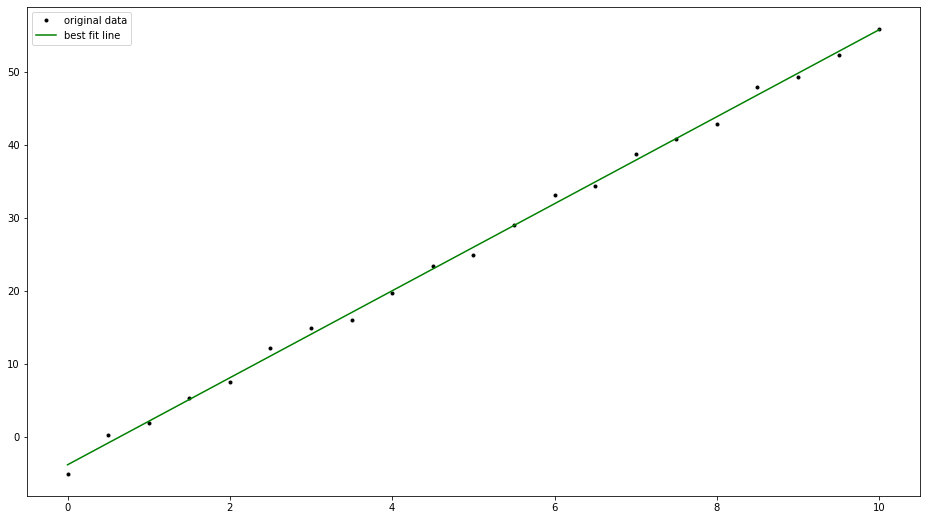

In [131]:
# Plot the original set of data and the line repesenting a best fit using the polyfit coefficients. 
# From a visual inspection the line derived from the polyfit fucntionlooks to be a good fit.
fig,ax = plt.subplots(figsize=(16,9))

# Plot original data
ax.plot(x,y,'k.', label = 'original data')

# Plot the data based on the polyfit output. Using np.polyval to evaluate the data as calculated from the polyfit, equivalent to 
# params[0]*x + params[1]
ax.plot(x, np.polyval(params,x) ,'g-', label = 'best fit line');

#ax.plot(x, params[0]*x + params[1] ,'g-', label = 'best fit line')
ax.legend();


In [133]:
# Now try plotting with much higher degrees of fit to demonstrate overfitting, note the warning message indicating likelihood of overfitting.
params = np.polyfit(x,y,100)


c:\Users\donne\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


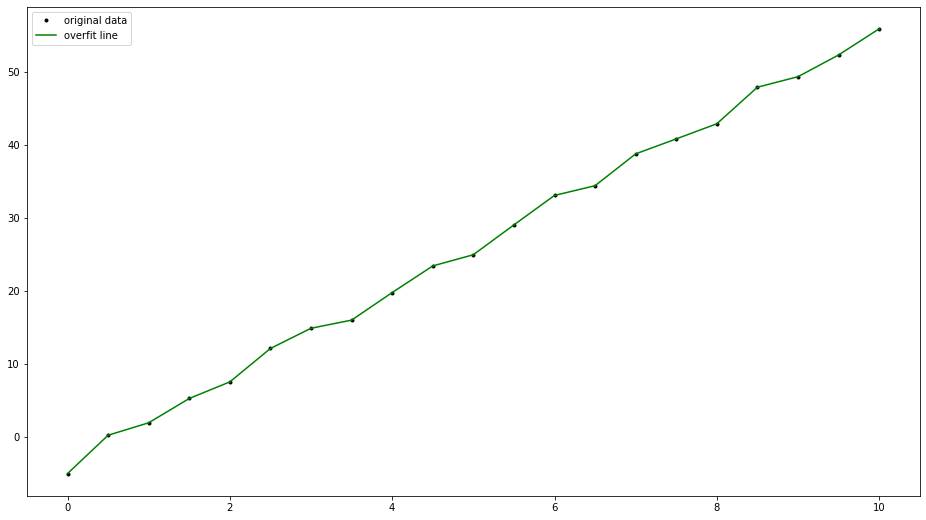

In [135]:
# Note from the plot every point is connected and therefore the model produced is not a true representation of the undrlying relationship, it has modelled all of the noise. 
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x,y,'k.', label = 'original data')

# Plot the data based on the polyfit output. Using np.polyval to evaluate the data as calculated from the polyfit.
ax.plot(x, np.polyval(params,x) ,'g-', label = 'overfit line');

ax.legend();

### Exercise on the 2 data sets. 
Below exercises 

In [121]:
# Data Set 1
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

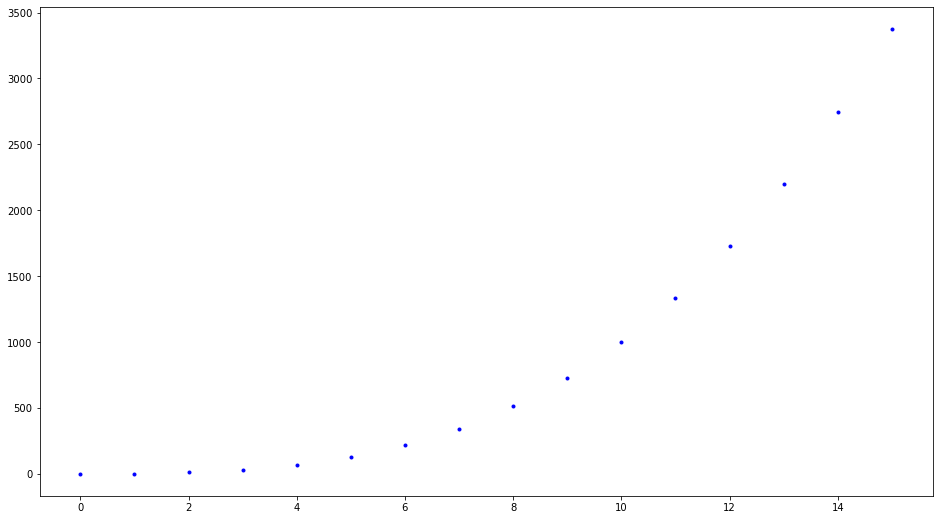

In [122]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x1,y1,'b.');


In [123]:
# Set the degrees 
degree1 = 2
params1 = np.polyfit(x1,y1,degree1)
params1

array([  22.51017157, -130.81095588,  137.31262255])

In [124]:
y1_fit = np.polyval(params1, x1)
y1_fit

array([ 137.31262255,   29.01183824,  -34.26860294,  -52.52870098,
        -25.76845588,   46.01213235,  162.81306373,  324.63433824,
        531.47595588,  783.33791667, 1080.22022059, 1422.12286765,
       1809.04585784, 2240.98919118, 2717.95286765, 3239.93688725])

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

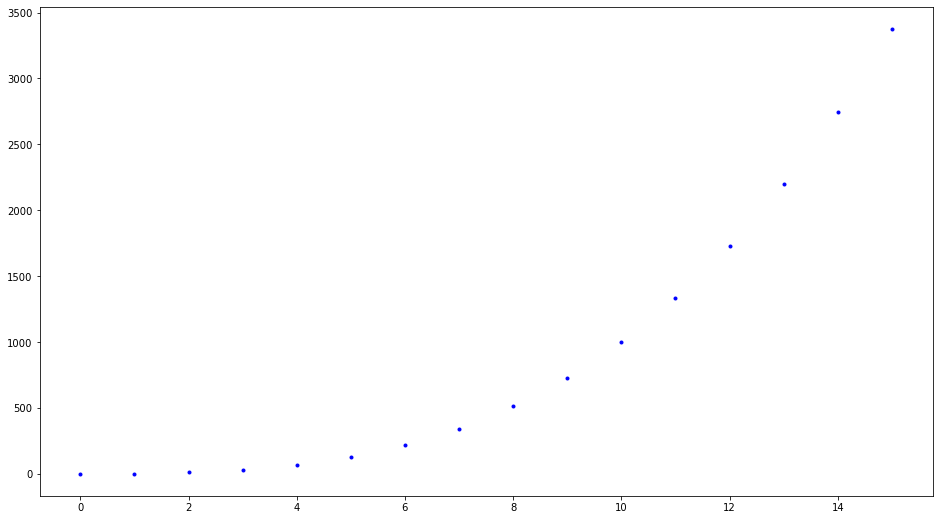

In [126]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x1, y1, 'b.' ,label='original data');

#ax.plot(x1, y1_fit,'g-', label='line fit');

ax.plot(x1, params1[0]*x1**2 + params1[1]*x1 + params1[2], 'g-')

ax.legend();

In [115]:
# Data Set 2
x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

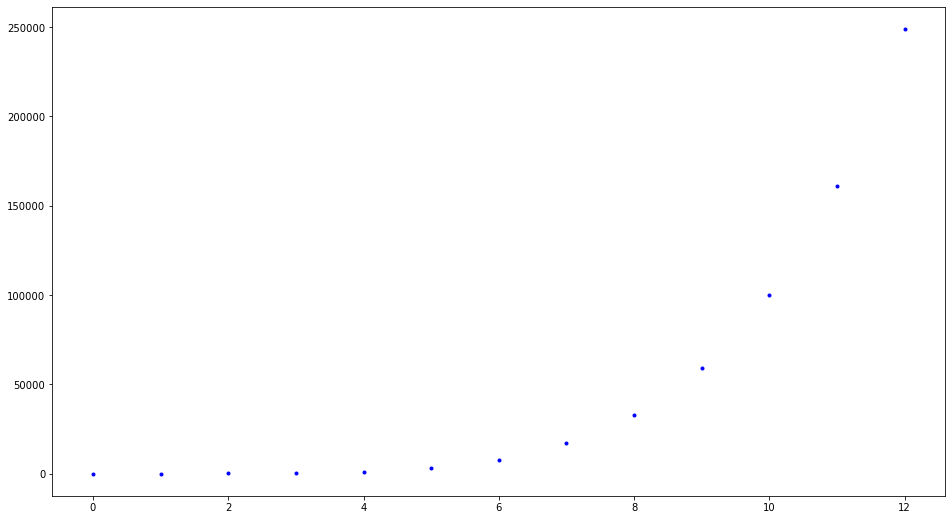

In [104]:
# Plot Data Set 2
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x2, y2, 'b.');


In [105]:
degree2 = 2
params2 = np.polyfit(x2,y2,degree2)
params2

array([  3218.5461039 , -22394.36478521,  22021.0989011 ])

In [106]:
y2_fit = np.polyval(params2, x2)
y2_fit

array([ 22021.0989011 ,   2845.28021978,  -9893.44625375, -16195.08051948,
       -16059.62257742,  -9487.07242757,   3522.56993007,  22969.3044955 ,
        48853.13126873,  81174.05024975, 119932.06143856, 165127.16483516,
       216759.36043956])

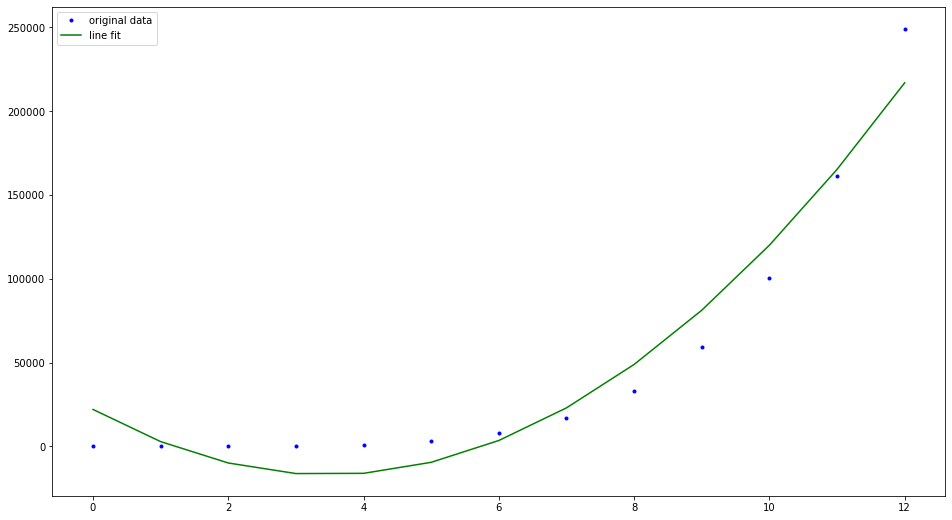

In [107]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x2, y2, 'b.' ,label='original data');

ax.plot(x2, y2_fit,'g-', label='line fit');

#ax.plot(x1, params1[0]*x1**2 + params1[1]*x1 + params1[2], 'g-')

ax.legend();

In [109]:
# having a look a a wider number space for the params that were calculated for Data Set 2
xtemp = np.linspace(-100, 100, 1000)

# using the params generated from the data set have a look at the zoomd out curve
y2_fit = np.polyval(params2, xtemp)

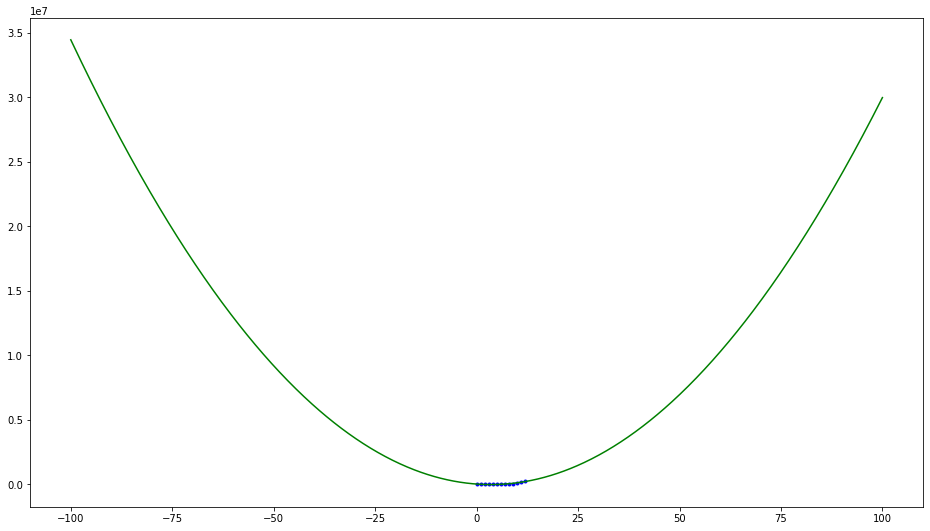

In [110]:
fig, ax = plt.subplots(figsize = (16,9))
ax.plot(x2, y2, 'b.');
ax.plot(xtemp, y2_fit,'g-');

# Exponentials

e^x

usually expressed as a*e^bx


In [19]:
import numpy as np
# Value of e as calculated ny numpy
np.e

2.718281828459045

In [20]:
# Try a plot based on an exponential. 
a , b = 1,1

x = np.linspace(0.0, 5, 101)

y = a*np.exp(b*x) + np.random.normal(0, 2, len(x))

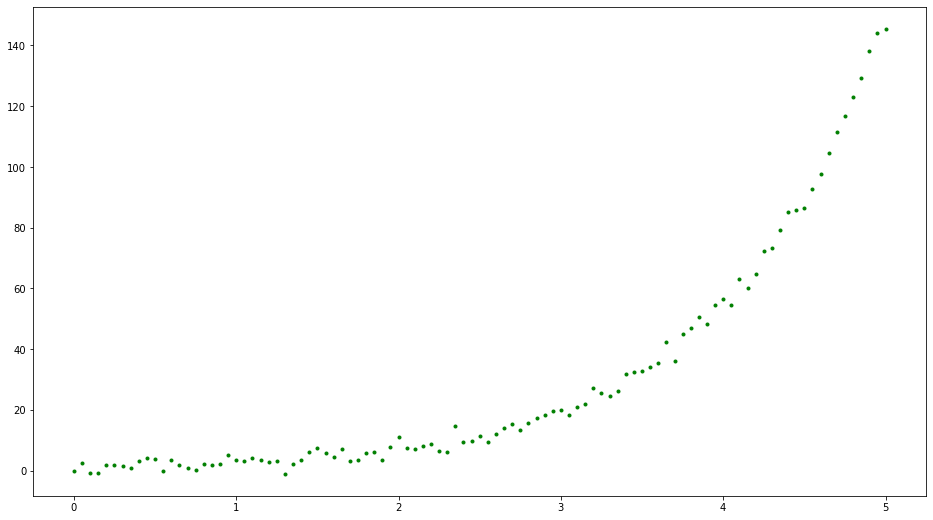

In [21]:
# This is the plot with x and y plotted normally
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x, y,'g.')

<ipython-input-22-c8747f537ca6>:5: RuntimeWarning: invalid value encountered in log
  ax.plot(x, np.log(y),'g.')


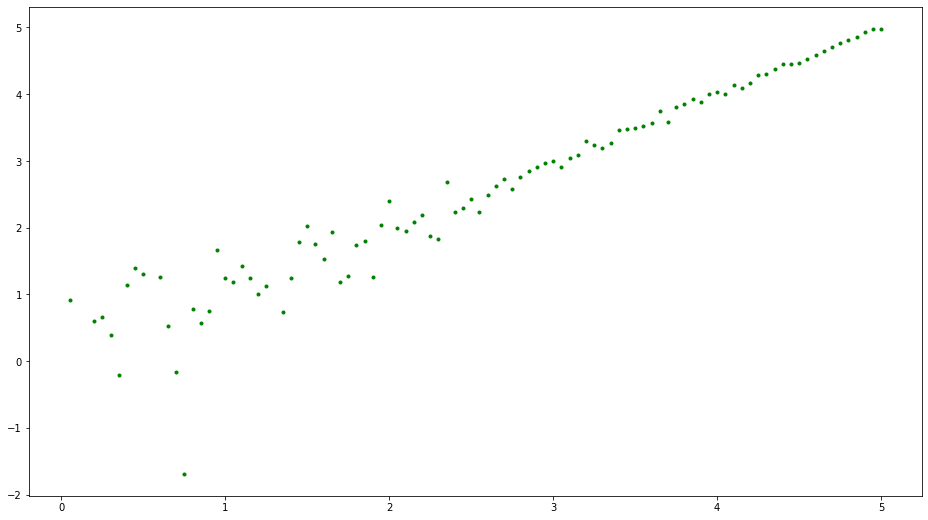

In [22]:
# In ordr to fit a line to an exponential plot need to consider it with the y values expressed as logs.
#below is the same graph as above except y axis is now on a log scale. 
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(x, np.log(y),'g.')

Given real world data how do determine an exponentioal relationship between x and y and then how to find the values of the variables a and b.

Fitting exponentials.

$ y = ae^{bx} $

$ log(y) = log(ae^{bx}) $

$ log(y) = log(a) + log(e^{bx}) $

$ log(y) = log(a) + bxlog(e) $

$ log(y) = log(a) + bx $

$ log(y) = bx + log(a) $ analagous to y = mx+c


In [23]:
np.log(y)

<ipython-input-23-d0070684806c>:1: RuntimeWarning: invalid value encountered in log
  np.log(y)


array([        nan,  0.91172035,         nan,         nan,  0.6067646 ,
        0.65974557,  0.39039421, -0.21042523,  1.13926797,  1.39749939,
        1.3059765 ,         nan,  1.26084549,  0.52106089, -0.16206133,
       -1.68490288,  0.77387877,  0.56914151,  0.75386813,  1.66087484,
        1.24251689,  1.18415087,  1.42593969,  1.24156486,  1.00582895,
        1.13057382,         nan,  0.74195552,  1.23965833,  1.7916764 ,
        2.02336631,  1.74912147,  1.52874197,  1.94123862,  1.18176104,
        1.27487837,  1.73892266,  1.80070445,  1.25430602,  2.04280484,
        2.39808706,  1.99627449,  1.94652348,  2.07986999,  2.18457935,
        1.87037297,  1.82331334,  2.68672297,  2.23850889,  2.28754801,
        2.43197585,  2.23155628,  2.49231434,  2.63132436,  2.72484076,
        2.58091398,  2.76036735,  2.85197454,  2.90559788,  2.96829674,
        2.99580581,  2.91545277,  3.04422527,  3.08622285,  3.30529305,
        3.23808341,  3.19793975,  3.26398844,  3.45838759,  3.47

In [24]:
# use of ~ NOT operator. This is a bitwise operator that inverts all values, i.e 1 becomes 0, True becomes False. 
nans=np.isnan(np.log(y))
xnan = x[~nans]



<ipython-input-24-f4ca95ed2728>:2: RuntimeWarning: invalid value encountered in log
  nans=np.isnan(np.log(y))


In [25]:
ynan = y[~nans]


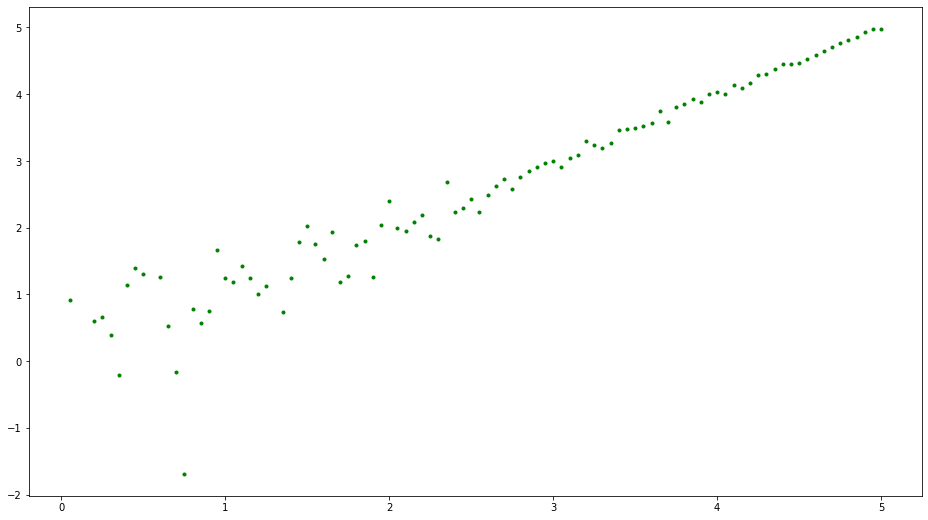

In [26]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(xnan, np.log(ynan),'g.')


In [27]:
params = np.polyfit(xnan, np.log(ynan), 1)
params

array([0.98246069, 0.03542875])

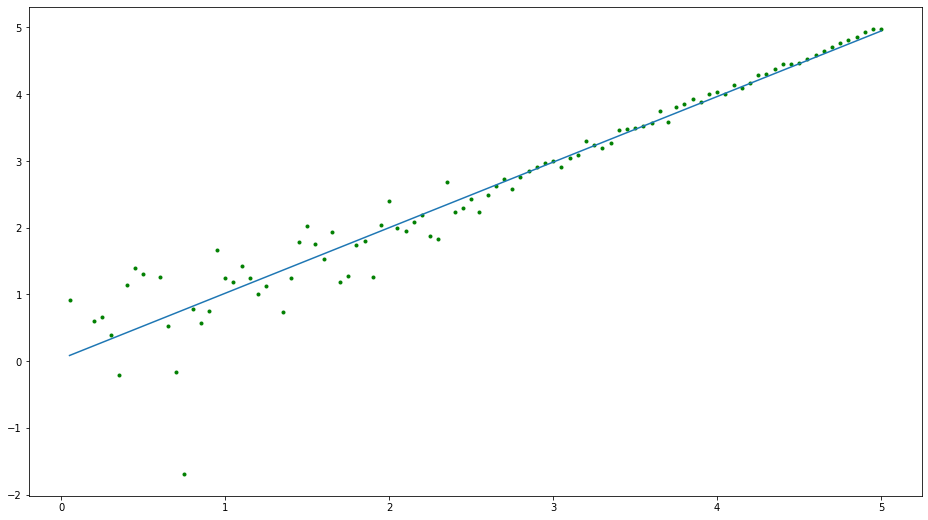

In [28]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(xnan, np.log(ynan),'g.')

ax.plot(xnan,np.polyval(params,xnan))

In [29]:
# Undo the effect of taking the log for the parameters.
a_fit, b_fit = np.e**params[1], params[0]
a_fit, b_fit

(1.0360638271697025, 0.9824606934443333)

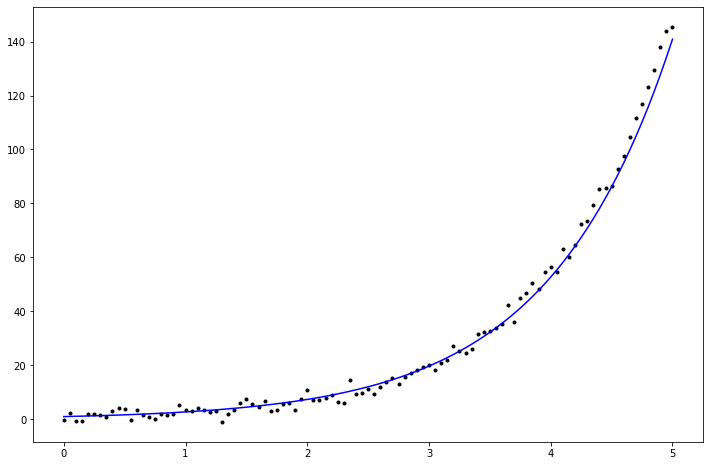

In [30]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x, y, 'k.')

ax.plot(x, a_fit * np.exp(b_fit * x), 'b-');